# NMDA2020第三次作业
MNIST是视觉处理方面的结构比较简单的标准数据集。我们已经将数据集整理，包括手写16\*16像素的黑白手写数字图像和对应的数字标记，并分为train,validation和test三组。图像数据已经转换为256长度的灰度值向量，标签的值为0-9。training set用于训练网络，validation set用于在训练过程中观察训练是否出现了过拟合。test set用于训练结束后评价训练结果。

本次作业将训练包含一层隐层的神经网络在MNIST数据集上进行分类任务。你需要完成Assignment3.ipynb和Network.py。

Assignment3.ipynb将引导你完成任务，你需要按顺序运行里面的模块。
Network.py中定义了Network类。Network类中定义了多个反向传播算法相关的方法，目前只是定义了接口，在下面的任务中需要完成代码。

如果你对python中面向对象概念不熟悉，请先学习相关的概念。可以参考https://zhuanlan.zhihu.com/p/37145434

### 要求完成并提交的文件：

* Assignment3.ipynb 本次作业的主要文件 （本文件）

* Network.py 本次作业中用来实现Network类的文件

* back_prop.pdf 推导反向传播的计算过程

### 我们提供的其他文件：

* X_test.npy X_train.npy X_val.npy Y_test.npy Y_train.npy Y_val.npy 数据文件，已经过整理
* test_utils.py test_pred.npy 帮助检验计算正确性的模组

### 数据格式：

* X: 为np.array，形状为\[N,256\]，其中N为数据的数量。
* y: 为np.array，形状为\[N,\]，N为数据的数量。y的值为0-9，对应相应的标签。
* 下面第二个单元可以用来显示数据的形状


In [1]:
#Initialization

import numpy as np
import matplotlib.pyplot as plt


#test tools
import test_utils

#setting plot default parameters
plt.rcParams['figure.figsize'] = (10.0, 9.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


Show an example:


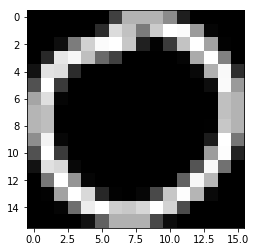

label: 0 

Train data shape:  (1000, 256)
Train labels shape:  (1000,)
Validation data shape:  (1000, 256)
Validation labels shape:  (1000,)
Test data shape:  (9000, 256)
Test labels shape:  (9000,)


In [2]:
# Load the data

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

print('Show an example:')
a0 = X_train[100,:].reshape(16,16)
plt.imshow(a0)
plt.show()
print('label:', y_train[100], '\n')

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

## 任务1 : 完成网络的前向传播

网络的结构为：输入层，隐层，输出层，softmax，交叉熵。其中，输入层，隐层，输出层由ReLu连接。最终的Loss由交叉熵和L2正则项得到。

网络的初始化位于Network类中的\_\_init\_\_方法中。这个方法是python中的类初始化方法。前向传播位于forward_pass方法中，参数为数据X,y,和L2正则项的参数wd_decay。其中,y为缺省参数，当没有y输入时应该输出预测的标签。

由于之后计算反向传播时需要隐层和输出层的计算结果，请将这些计算结果以Network类的成员形式储存。

在未经训练的状态下，loss应接近2.30

### 随机数，伪随机和随机种子：

计算机中存在两种随机数：一类是比较常用的伪随机数，是由一定的算法产生的随机数序列截取而成。这种随机数在一定长度内可以保证相关性为0，通常可以直接作为随机数使用。另一种为真随机数，使用物理方法生成，通过测量物理上不可预测的小量生成。我们在这次作业中使用的都是伪随机数。

随机种子可以控制随机序列的起始状态。而后，根据不同的随机算法，可以迭代出无限长的随机序列。因此，当确定随机种子后，随机序列也完全确定。

任务1中，助教已经使用0作为随机种子，通过随机初始化得到了一个神经网络，并得到了在测试集上的预测。如果你的随机初始化方法和题目要求相同，使用了相同的随机种子，你也应当在测试集上得到相同的预测结果。我们会检查你的预测结果和我们得到的预测结果是否相同

### 要求：
* 参数初始化：W初始化为标准差std的正态分布，b初始化为0
* 前向传播：输入标签y时返回loss，不输入标签y时返回预测的标签predict，predict与y形状相同。

In [3]:
#Test run for task 1

from Network import Network

np.random.seed(0)
hidden_size = 256

net = Network(hidden_size)
predict = net.forward_pass(X_test)
if test_utils.check_pred(predict):
    print('Your prediction PASSed check!')
else: 
    print('Your prediction FAILed check!')
    
loss = net.forward_pass(X_test, y_test)
print('Loss = %f' % loss)

Your prediction PASSed check!
Loss = 2.302585


## 任务2+3：完成网络的反向传播
为检验反向传播算法的正确性，要求使用数值计算梯度进行对比。反向传播和数值计算梯度分别对应back_prop方法和numerical_gradient方法。需要返回grads，类似于params成员，其中包括W1,b1,W2,b2所对应的梯度。
### 要求：
* 推倒反向传播计算过程
* 完成Network类的back_prop方法，返回梯度grads
* 完成数值计算梯度，以小量delta为步长计算梯度并返回
* 检验两种梯度计算结果是否相同

In [4]:
#Test run for task3 

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5
wd_decay = 0.05
delta = 1e-5

np.random.seed(0)

net = Network(input_size = input_size, hidden_size = hidden_size, output_size = num_classes, std=1e-1)
X, y = test_utils.init_toy_data(num_inputs, input_size, num_classes)

loss = net.forward_pass(X, y, wd_decay = wd_decay)
grads = net.back_prop(X, y, wd_decay = wd_decay)
num_grads = net.numerical_gradient(X, y, wd_decay = wd_decay, delta = delta)

# Errors should all be less than 1e-8 or so
for param_name in grads:
    print('%s max relative error: %e' % (param_name, test_utils.rel_error(num_grads[param_name], grads[param_name])))

W2 max relative error: 4.201360e-07
b2 max relative error: 8.412090e-08
W1 max relative error: 3.201751e-08
b1 max relative error: 2.763003e-08


## 任务4：随机梯度下降
得到了正确的梯度后，可以开始使用随机梯度下降方法进行网络训练，这部分对应train方法。请使用之前实现的前向传播算法和反向传播算法，实现支持momentum的随机梯度下降。在随机梯度下降迭代过程中，每次需要选取数据集的一部分作为minibatch作为数据，这里可能用到numpy.random.choice。为了查看训练过程，需要记录下训练中的loss和正确率的变化过程。代码中提供了4个容器用来记录loss_history,acc_history,val_loss_history,val_acc_history。可以使用append添加记录。

### 要求：
* 实现梯度下降，支持momentum和minibatch
* 记录训练过程中的loss变化和正确率变化

### 为了可以重现实验的结果，以下部分请使用学号作为随机初始化的种子

iteration 0 / 140: training loss 2.302585 val loss: 2.302585
iteration 10 / 140: training loss 2.296557 val loss: 2.304596
iteration 20 / 140: training loss 2.305410 val loss: 2.308531
iteration 30 / 140: training loss 2.245251 val loss: 2.303445
iteration 40 / 140: training loss 2.265204 val loss: 2.237176
iteration 50 / 140: training loss 2.222572 val loss: 2.013877
iteration 60 / 140: training loss 1.717882 val loss: 1.924171
iteration 70 / 140: training loss 2.076470 val loss: 1.859227
iteration 80 / 140: training loss 2.002200 val loss: 1.657014
iteration 90 / 140: training loss 1.603985 val loss: 1.422750
iteration 100 / 140: training loss 1.565066 val loss: 1.269008
iteration 110 / 140: training loss 1.571828 val loss: 1.233720
iteration 120 / 140: training loss 1.040390 val loss: 0.994074
iteration 130 / 140: training loss 0.933169 val loss: 0.972967


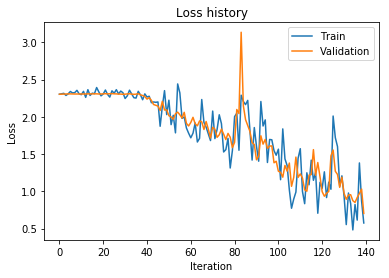

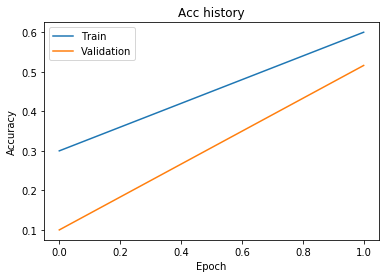

Final accuracy on test set: 0.7202222222222222


In [5]:
# Test run for task 4

np.random.seed(2018012036)

hidden_size = 10

net = Network(hidden_size = hidden_size)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.5, momentum=0, wd_decay=0, 
            num_iters=140, batch_size=10,
            do_early_stopping=False,
            print_every=10, verbose=True)

test_utils.plot_loss_history(stats['loss_history'], stats['val_loss_history'])
test_utils.plot_acc_history(stats['acc_history'],stats['val_acc_history'])
print('Final accuracy on test set:', net.get_acc(X_test, y_test))

## 任务5：Overfitting
 
我们已经得到了一个可以工作的神经网络，并且实现了使用梯度下降进行训练。下面，我们使用一个256隐层的网络去训练。训练结果可以很明显的看到，出现了严重的过拟合现象。
Early stop策略是一种简单的防止过拟合的策略，通过loss的变化监测何时停止训练。
Learning rate decay 是另一个常见的训练策略。通过逐步减小的learning rate达到更好的训练效果。 

### 要求：
* 修改训练过程，实现early stop
* 修改训练过程，实现Learning rate decay

iteration 0 / 1000: training loss 2.302585 val loss: 2.302585
iteration 50 / 1000: training loss 2.268831 val loss: 2.270443
iteration 100 / 1000: training loss 1.343458 val loss: 1.412081
iteration 150 / 1000: training loss 0.702754 val loss: 0.676894
iteration 200 / 1000: training loss 0.197497 val loss: 0.379913
iteration 250 / 1000: training loss 0.206462 val loss: 0.333352
iteration 300 / 1000: training loss 0.121725 val loss: 0.339986
iteration 350 / 1000: training loss 0.115526 val loss: 0.313228
iteration 400 / 1000: training loss 0.060555 val loss: 0.313533
iteration 450 / 1000: training loss 0.051121 val loss: 0.326355
iteration 500 / 1000: training loss 0.103568 val loss: 0.339757


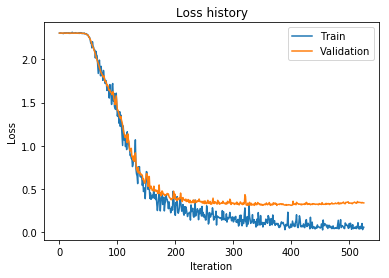

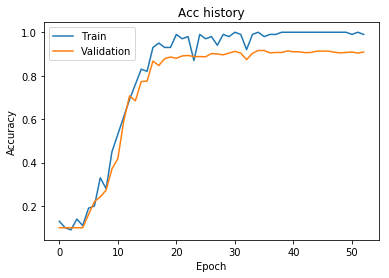

Final accuracy on test set: 0.911


In [6]:
#Demo run for overfitting

np.random.seed(2018012036)

hidden_size = 10

net = Network(hidden_size = hidden_size)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.35, momentum=0.9, wd_decay=0, 
            num_iters=1000, batch_size=100,
            do_early_stopping=False,
            print_every=50, verbose=True)

test_utils.plot_loss_history(stats['loss_history'],stats['val_loss_history'])
test_utils.plot_acc_history(stats['acc_history'],stats['val_acc_history'])
print('Final accuracy on test set:', net.get_acc(X_test, y_test))

iteration 0 / 1000: training loss 2.302585 val loss: 2.302585
iteration 50 / 1000: training loss 2.283702 val loss: 2.285129
iteration 100 / 1000: training loss 1.579808 val loss: 1.651907
iteration 150 / 1000: training loss 1.168121 val loss: 1.123559
iteration 200 / 1000: training loss 0.729016 val loss: 0.850278
iteration 250 / 1000: training loss 0.778895 val loss: 0.821956
iteration 300 / 1000: training loss 0.723019 val loss: 0.807778
iteration 350 / 1000: training loss 0.721215 val loss: 0.811621
iteration 400 / 1000: training loss 0.636057 val loss: 0.787860
iteration 450 / 1000: training loss 0.662091 val loss: 0.797056
iteration 500 / 1000: training loss 0.701621 val loss: 0.823106
iteration 550 / 1000: training loss 0.746391 val loss: 0.812110
iteration 600 / 1000: training loss 0.735876 val loss: 0.829910
iteration 650 / 1000: training loss 0.653057 val loss: 0.800789
iteration 700 / 1000: training loss 0.647818 val loss: 0.796989
iteration 750 / 1000: training loss 0.65212

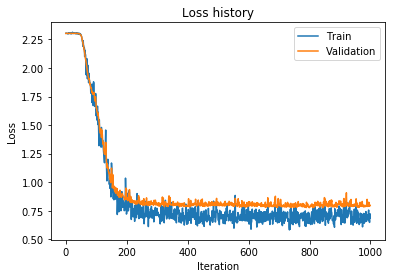

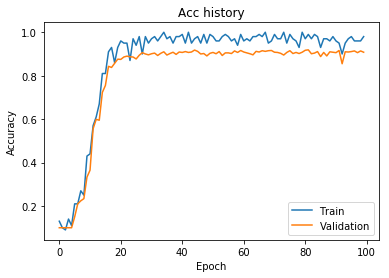

Final accuracy on test set: 0.9123333333333333


In [7]:
# Test run for task 5

#
# TODO : training process with early stop
#

np.random.seed(2018012036)

hidden_size = 10

net = Network(hidden_size = hidden_size)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.35, momentum=0.9, wd_decay=0.02, 
            num_iters=1000, batch_size=100,
            do_early_stopping=True,alpha = 1,
            print_every=50, verbose=True)

test_utils.plot_loss_history(stats['loss_history'],stats['val_loss_history'])
test_utils.plot_acc_history(stats['acc_history'],stats['val_acc_history'])
print('Final accuracy on test set:', net.get_acc(X_test, y_test))

由于加入了wd_decay（前面的demo未加入），early stopping并未提前结束学习，肉眼观察也可发现并没有明显的过拟合现象。在前面的demo使用early stopping，可以观察到较好的early stopping

iteration 0 / 1000: training loss 2.302585 val loss: 2.302585
iteration 50 / 1000: training loss 2.283702 val loss: 2.285129
iteration 100 / 1000: training loss 1.579808 val loss: 1.651907
iteration 150 / 1000: training loss 1.168121 val loss: 1.123559
iteration 200 / 1000: training loss 0.729016 val loss: 0.850278
iteration 250 / 1000: training loss 0.776943 val loss: 0.820059
iteration 300 / 1000: training loss 0.722354 val loss: 0.807115
iteration 350 / 1000: training loss 0.719256 val loss: 0.809708
iteration 400 / 1000: training loss 0.635559 val loss: 0.787094
iteration 450 / 1000: training loss 0.660716 val loss: 0.795727
iteration 500 / 1000: training loss 0.699914 val loss: 0.818306
iteration 550 / 1000: training loss 0.745602 val loss: 0.808598
iteration 600 / 1000: training loss 0.733275 val loss: 0.826571
iteration 650 / 1000: training loss 0.652013 val loss: 0.800348
iteration 700 / 1000: training loss 0.645011 val loss: 0.793887
iteration 750 / 1000: training loss 0.64916

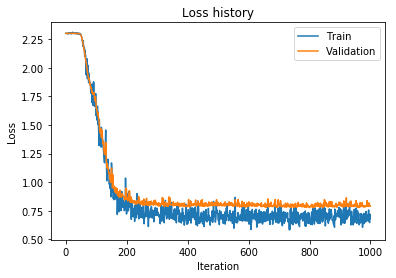

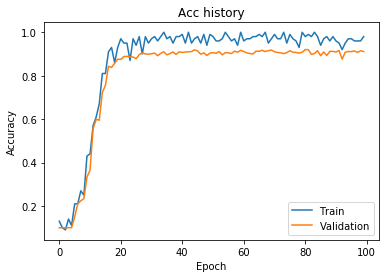

Final accuracy on test set: 0.9118888888888889


In [9]:
# Test run for task 5

#
# TODO : training process with Learning rate decay
#

np.random.seed(2018012036)

hidden_size = 10

net = Network(hidden_size = hidden_size)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.35, momentum=0.9, wd_decay=0.02, 
            num_iters=1000, batch_size=100,
            do_early_stopping=False,alpha = 0,
            print_every=50, verbose=True,do_learning_rate_decay=True,learning_rate_decay=0.98)

test_utils.plot_loss_history(stats['loss_history'],stats['val_loss_history'])
test_utils.plot_acc_history(stats['acc_history'],stats['val_acc_history'])
print('Final accuracy on test set:', net.get_acc(X_test, y_test))

## 任务6：Tuning
 
调整超参数，得到尽量好的神经网络。初始化参数和网络参数都可能对最终的训练结果产生影响。

网格搜索法是一种常见的调参方法。将不同参数的可能取值列出，选择参数取值不同排列组合进行训练，最后可以选出最优的一组参数。

随机搜索法是另一种常见的调参方法。当网格搜索法调参需要的计算量过大时，可以使用随机搜索法进行，通过不断的随机出超参数进行训练，多次随机后选择最优的一组参数。

### 可以调整的超参数有：
* learning rate
* L2 regularization factor
* Hidden layer size
* learning rate decay
* early stop policy

### 要求：
* 使用网格搜索法或随机搜索法，得到一组超参数。除了列出的超参数外，也可以选择调整别的参数。请保留你的调参过程的代码。
* 展示得到的超参数进行训练的最终结果和Loss记录，在notebook中记录选择的参数和在测试集上得到的正确率。画图可以使用test_utils.plot_loss_history，用法参考前面的代码。

In [32]:
# Test run for task 6
# 采用网格搜索

np.random.seed(2018012036)

learning_rate=0.35
wd_decay=0.02
hidden_size = 10
learning_rate_decay=0.98
alpha=1

best_acc=0
for learning_rate in [0.3,0.35,0.4]:
    for hidden_size in [10,30,50]:
        for wd_decay in [0.01,0.02,0.03]:
            print("learning_rate:",learning_rate," hidden_size:",hidden_size," wd_decay:",wd_decay)
            net = Network(hidden_size = hidden_size)

            stats = net.train(X_train, y_train, X_val, y_val,
                        learning_rate=learning_rate, momentum=0.9, wd_decay=wd_decay, 
                        num_iters=1000, batch_size=100,
                        do_early_stopping=True,alpha = alpha,
                        print_every=50, verbose=True,do_learning_rate_decay=True,learning_rate_decay=learning_rate_decay)
        
            acc=net.get_acc(X_test,y_test)
            if acc>best_acc:
                best_acc=acc
                best_parameters={'learning_rate':learning_rate,'hidden_size':hidden_size,'wd_decay':wd_decay}
print("best acc:",best_acc)
print(best_parameters)

learning_rate: 0.3  hidden_size: 10  wd_decay: 0.01
iteration 0 / 1000: training loss 2.302585 val loss: 2.302585
iteration 50 / 1000: training loss 2.297942 val loss: 2.299078
iteration 100 / 1000: training loss 1.663002 val loss: 1.721302
iteration 150 / 1000: training loss 1.102345 val loss: 1.086120
iteration 200 / 1000: training loss 0.553147 val loss: 0.681068
iteration 250 / 1000: training loss 0.558140 val loss: 0.624718
iteration 300 / 1000: training loss 0.496261 val loss: 0.613724
iteration 350 / 1000: training loss 0.488237 val loss: 0.599168
iteration 400 / 1000: training loss 0.419112 val loss: 0.590281
iteration 450 / 1000: training loss 0.429438 val loss: 0.595127
iteration 500 / 1000: training loss 0.482187 val loss: 0.610985
iteration 550 / 1000: training loss 0.508090 val loss: 0.606072
iteration 600 / 1000: training loss 0.493544 val loss: 0.624376
iteration 650 / 1000: training loss 0.428125 val loss: 0.615188
iteration 700 / 1000: training loss 0.417306 val loss: 

learning_rate: 0.3  hidden_size: 50  wd_decay: 0.03
iteration 0 / 1000: training loss 2.302587 val loss: 2.302587
iteration 50 / 1000: training loss 2.287014 val loss: 2.293047
iteration 100 / 1000: training loss 1.568495 val loss: 1.607718
iteration 150 / 1000: training loss 1.128322 val loss: 1.120716
iteration 200 / 1000: training loss 0.945004 val loss: 1.000998
iteration 250 / 1000: training loss 0.989397 val loss: 0.959073
iteration 300 / 1000: training loss 0.901174 val loss: 0.982847
iteration 350 / 1000: training loss 0.813040 val loss: 0.950796
iteration 400 / 1000: training loss 0.929021 val loss: 0.953176
iteration 450 / 1000: training loss 0.904591 val loss: 0.938925
iteration 500 / 1000: training loss 0.912906 val loss: 0.978778
iteration 550 / 1000: training loss 0.849413 val loss: 0.946981
iteration 600 / 1000: training loss 0.888640 val loss: 0.944226
iteration 650 / 1000: training loss 0.924316 val loss: 0.952659
iteration 700 / 1000: training loss 0.888562 val loss: 

iteration 50 / 1000: training loss 2.222154 val loss: 2.226722
iteration 100 / 1000: training loss 1.138327 val loss: 1.213437
iteration 150 / 1000: training loss 0.595708 val loss: 0.704596
iteration 200 / 1000: training loss 0.462486 val loss: 0.589684
iteration 250 / 1000: training loss 0.513732 val loss: 0.601689
iteration 300 / 1000: training loss 0.445139 val loss: 0.583451
iteration 350 / 1000: training loss 0.473446 val loss: 0.587803
iteration 400 / 1000: training loss 0.475664 val loss: 0.585055
iteration 450 / 1000: training loss 0.457556 val loss: 0.592170
iteration 500 / 1000: training loss 0.403234 val loss: 0.597273
iteration 550 / 1000: training loss 0.485526 val loss: 0.591744
iteration 600 / 1000: training loss 0.419991 val loss: 0.592414
iteration 650 / 1000: training loss 0.441149 val loss: 0.600865
iteration 700 / 1000: training loss 0.388984 val loss: 0.589640
iteration 750 / 1000: training loss 0.399485 val loss: 0.591371
iteration 800 / 1000: training loss 0.439

iteration 350 / 1000: training loss 0.436987 val loss: 0.593291
iteration 400 / 1000: training loss 0.447377 val loss: 0.623214
iteration 450 / 1000: training loss 0.505327 val loss: 0.595598
iteration 500 / 1000: training loss 0.416167 val loss: 0.598627
iteration 550 / 1000: training loss 0.448609 val loss: 0.593102
iteration 600 / 1000: training loss 0.448019 val loss: 0.589319
iteration 650 / 1000: training loss 0.393174 val loss: 0.594203
iteration 700 / 1000: training loss 0.545319 val loss: 0.652002
iteration 750 / 1000: training loss 0.425299 val loss: 0.590191
iteration 800 / 1000: training loss 0.441931 val loss: 0.594624
iteration 850 / 1000: training loss 0.408811 val loss: 0.597989
iteration 900 / 1000: training loss 0.488801 val loss: 0.595961
iteration 950 / 1000: training loss 0.408302 val loss: 0.588408
learning_rate: 0.4  hidden_size: 30  wd_decay: 0.02
iteration 0 / 1000: training loss 2.302586 val loss: 2.302586
iteration 50 / 1000: training loss 2.139363 val loss: 

由于算力限制，并未一次性列出所有可调节参数，之前也进行了几次预调节，确定最佳参数大致范围

iteration 0 / 1000: training loss 2.302585 val loss: 2.302585
iteration 50 / 1000: training loss 2.269016 val loss: 2.270568
iteration 100 / 1000: training loss 1.344110 val loss: 1.343981
iteration 150 / 1000: training loss 0.645014 val loss: 0.675366
iteration 200 / 1000: training loss 0.614700 val loss: 0.608659
iteration 250 / 1000: training loss 0.562481 val loss: 0.592635
iteration 300 / 1000: training loss 0.564527 val loss: 0.590994
iteration 350 / 1000: training loss 0.470320 val loss: 0.588739
iteration 400 / 1000: training loss 0.423121 val loss: 0.591753
iteration 450 / 1000: training loss 0.514672 val loss: 0.592056
iteration 500 / 1000: training loss 0.425140 val loss: 0.600984
iteration 550 / 1000: training loss 0.459065 val loss: 0.601164
iteration 600 / 1000: training loss 0.376329 val loss: 0.587131
iteration 650 / 1000: training loss 0.437311 val loss: 0.592388
iteration 700 / 1000: training loss 0.430097 val loss: 0.608780
iteration 750 / 1000: training loss 0.47695

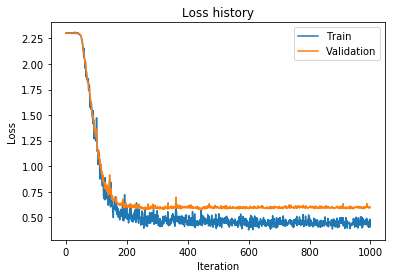

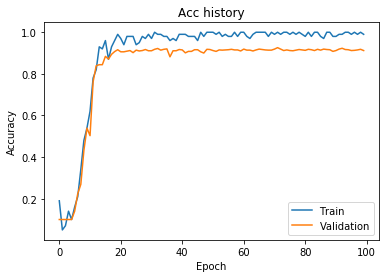

Final accuracy on test set: 0.9178888888888889


In [34]:
learning_rate=best_parameters['learning_rate']
hidden_size=best_parameters['hidden_size']
wd_decay=best_parameters['wd_decay']

np.random.seed(2018012036)

net = Network(hidden_size = hidden_size)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=learning_rate, momentum=0.9, wd_decay=wd_decay, 
            num_iters=1000, batch_size=100,
            do_early_stopping=True,alpha = 1,
            print_every=50, verbose=True,do_learning_rate_decay=True,learning_rate_decay=learning_rate_decay)

test_utils.plot_loss_history(stats['loss_history'],stats['val_loss_history'])
test_utils.plot_acc_history(stats['acc_history'],stats['val_acc_history'])
print('Final accuracy on test set:', net.get_acc(X_test, y_test))